# Exploratory Data Analysis

## Phase 1 - Step 1: Data Understanding & Sanity Checks

This notebook performs initial exploratory data analysis for the real-estate price prediction project.



In [9]:
# Install required packages if not already installed
import subprocess
import sys

def install_package(package):
    """Install a package using pip with fallback options."""
    try:
        __import__(package)
        print(f"✓ {package} is already installed.")
        return True
    except ImportError:
        print(f"Installing {package}...")
        methods = [
            [sys.executable, "-m", "pip", "install", package, "--break-system-packages"],
            [sys.executable, "-m", "pip", "install", package],
            [sys.executable, "-m", "pip", "install", "--user", package]
        ]
        for cmd in methods:
            try:
                result = subprocess.run(cmd, capture_output=True, text=True, timeout=60)
                if result.returncode == 0:
                    print(f"✓ {package} installed successfully!")
                    return True
            except:
                continue
        print(f"✗ Failed to install {package}. Please install manually.")
        return False

# Check and install required packages
required_packages = {
    'openpyxl': 'openpyxl',
    'pandas': 'pandas', 
    'numpy': 'numpy',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn'
}

for import_name, package_name in required_packages.items():
    try:
        __import__(import_name)
    except ImportError:
        install_package(package_name)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set working directory to project root
project_root = '/Users/macbookpro/Documents/Cursor Projects/CDC /satellite-property-valuation'
if os.path.exists(project_root):
    os.chdir(project_root)
    print(f"\n✓ Working directory: {os.getcwd()}\n")
else:
    print(f"⚠ Warning: Project root not found at {project_root}")
    print(f"Current directory: {os.getcwd()}\n")


Installing openpyxl...
✓ openpyxl installed successfully!

✓ Working directory: /Users/macbookpro/Documents/Cursor Projects/CDC /satellite-property-valuation



## 1. Load the Datasets


In [10]:
# Load train and test datasets
# Note: Using actual filenames if train.xlsx/test.xlsx don't exist
train_path = 'data/raw/train.xlsx'
test_path = 'data/raw/test.xlsx'

# Check if files exist, otherwise use alternative names
if not os.path.exists(train_path):
    train_path = 'data/raw/train(1).xlsx'
if not os.path.exists(test_path):
    test_path = 'data/raw/test2.xlsx'

# Load datasets
train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)

# Print shapes
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("\n" + "="*50 + "\n")

# Display first 5 rows of train data
print("First 5 rows of train data:")
train_df.head()


Train dataset shape: (16209, 21)
Test dataset shape: (5404, 20)


First 5 rows of train data:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


## 2. Basic Data Inspection


In [11]:
# Print dataset info
print("Train dataset info:")
print(train_df.info())
print("\n" + "="*50 + "\n")

# Check missing values
print("Missing values in train dataset:")
missing_values = train_df.isnull().sum()
print(missing_values)
print("\n" + "="*50 + "\n")

# Columns with missing values
columns_with_missing = missing_values[missing_values > 0]
if len(columns_with_missing) > 0:
    print(f"Columns with missing values ({len(columns_with_missing)}):")
    print(columns_with_missing)
else:
    print("No missing values found in the dataset.")


Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null 

### Missing Values Summary

**Analysis:** 
- Missing values check completed above.
- If missing values exist, they need to be handled during preprocessing.
- Common strategies include imputation, dropping rows/columns, or using missing value indicators.


## 3. Target Variable Analysis (Price)


Using price column: 'price'


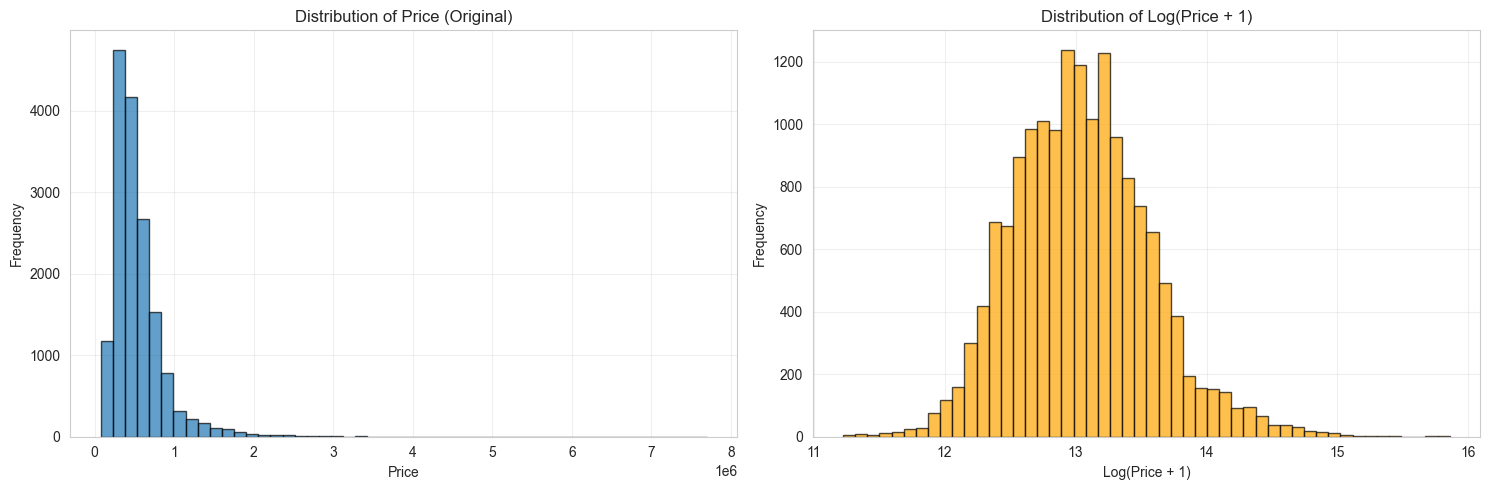


Price Statistics:
count    1.620900e+04
mean     5.374703e+05
std      3.603036e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

Log(Price) Statistics:
count    16209.000000
mean        13.045201
std          0.523880
min         11.225257
25%         12.676079
50%         13.017005
75%         13.369225
max         15.856731
Name: price, dtype: float64


In [12]:
# Check if 'price' column exists (case-insensitive)
price_col = None
for col in train_df.columns:
    if col.lower() == 'price':
        price_col = col
        break

if price_col is None:
    print("Available columns:", train_df.columns.tolist())
    print("\nPlease check the actual name of the price column.")
else:
    print(f"Using price column: '{price_col}'")
    
    # Plot histogram of price
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Original price histogram
    axes[0].hist(train_df[price_col], bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Price')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Price (Original)')
    axes[0].grid(True, alpha=0.3)
    
    # Log-transformed price histogram
    log_price = np.log1p(train_df[price_col])
    axes[1].hist(log_price, bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_xlabel('Log(Price + 1)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distribution of Log(Price + 1)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print basic statistics
    print(f"\nPrice Statistics:")
    print(train_df[price_col].describe())
    print(f"\nLog(Price) Statistics:")
    print(pd.Series(log_price).describe())


### Why Log Transformation?

**Log transformation of price is useful because:**

1. **Right-skewed distribution**: Real estate prices typically follow a right-skewed distribution with a long tail of expensive properties. Log transformation helps normalize this distribution.

2. **Reduced impact of outliers**: Extreme high-value properties have less influence on the model when using log(price), making the model more robust.

3. **Multiplicative relationships**: Many real estate factors (like square footage, location premium) have multiplicative rather than additive effects on price. Log transformation converts these to linear relationships.

4. **Better model performance**: Many regression algorithms assume normally distributed target variables. Log transformation helps meet this assumption.

5. **Interpretability**: Changes in log(price) can be interpreted as percentage changes in price, which is often more meaningful than absolute dollar changes.


## 4. Outlier Inspection


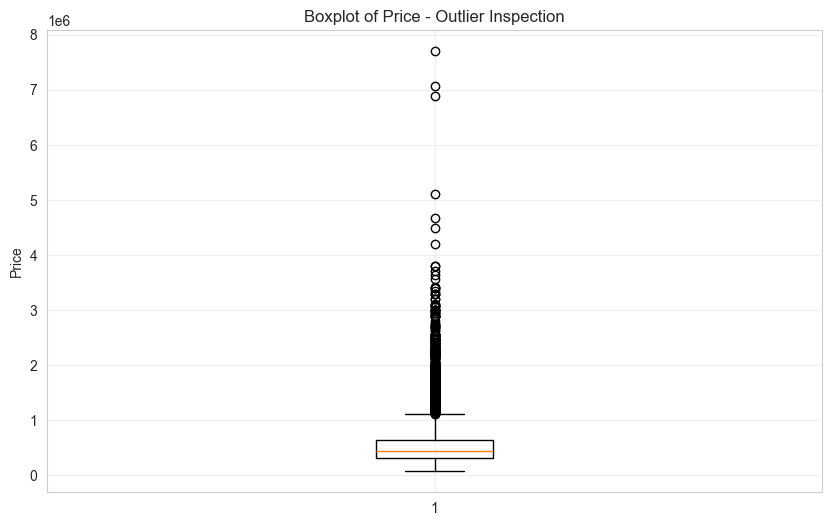

Number of outliers (using IQR method): 850
Percentage of outliers: 5.24%

Lower bound: $-160,000.00
Upper bound: $1,120,000.00

Extreme outliers (beyond 3*IQR):
Count: 310


In [13]:
# Boxplot of price
if price_col:
    plt.figure(figsize=(10, 6))
    plt.boxplot(train_df[price_col], vert=True)
    plt.ylabel('Price')
    plt.title('Boxplot of Price - Outlier Inspection')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Calculate IQR for outlier detection
    Q1 = train_df[price_col].quantile(0.25)
    Q3 = train_df[price_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_df[(train_df[price_col] < lower_bound) | (train_df[price_col] > upper_bound)]
    print(f"Number of outliers (using IQR method): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(train_df)*100:.2f}%")
    print(f"\nLower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    print(f"\nExtreme outliers (beyond 3*IQR):")
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR
    extreme_outliers = train_df[(train_df[price_col] < extreme_lower) | (train_df[price_col] > extreme_upper)]
    print(f"Count: {len(extreme_outliers)}")


**Note:** Outliers are identified but NOT removed at this stage. They will be handled during preprocessing if necessary.


## 5. Relationship Analysis


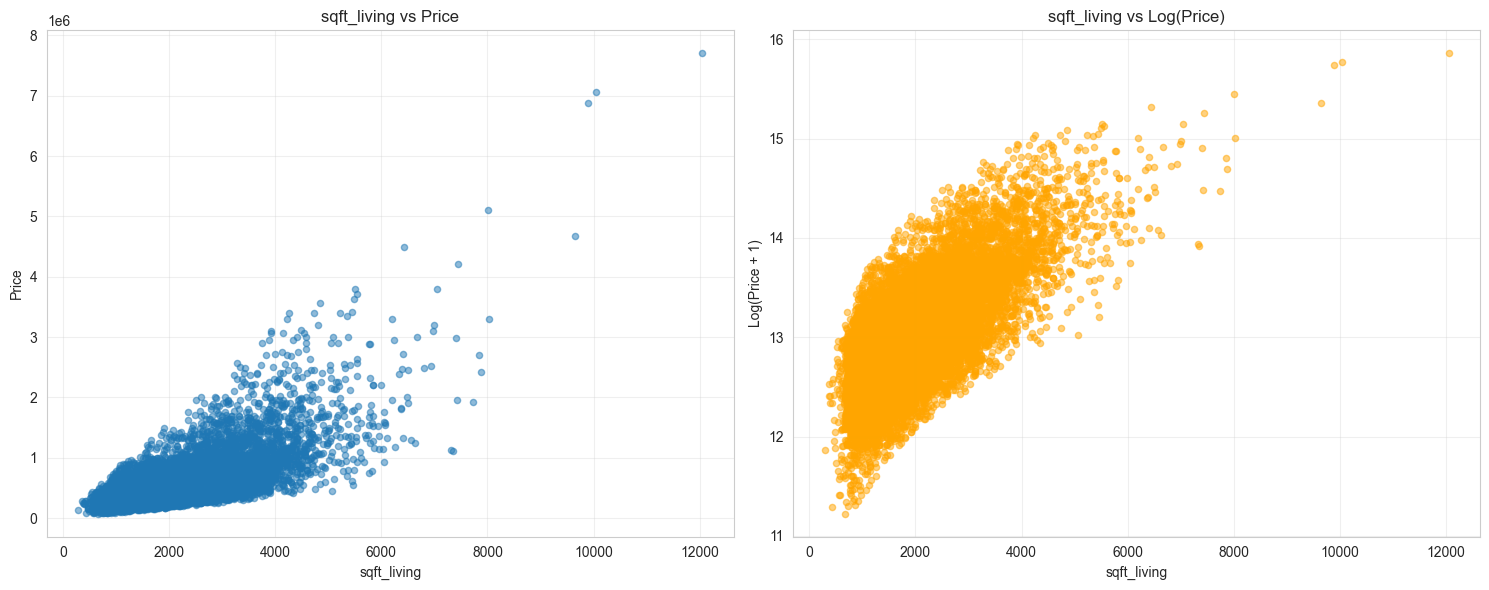


Correlation (sqft_living vs Price): 0.7009
Correlation (sqft_living vs Log(Price)): 0.6934


In [14]:
# Find sqft_living column (case-insensitive)
sqft_col = None
for col in train_df.columns:
    if 'sqft' in col.lower() and 'living' in col.lower():
        sqft_col = col
        break

if sqft_col is None:
    # Try to find any sqft column
    for col in train_df.columns:
        if 'sqft' in col.lower():
            sqft_col = col
            print(f"Using '{sqft_col}' as square footage column")
            break

if sqft_col and price_col:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot: sqft_living vs price
    axes[0].scatter(train_df[sqft_col], train_df[price_col], alpha=0.5, s=20)
    axes[0].set_xlabel(f'{sqft_col}')
    axes[0].set_ylabel('Price')
    axes[0].set_title(f'{sqft_col} vs Price')
    axes[0].grid(True, alpha=0.3)
    
    # Scatter plot: sqft_living vs log(price)
    log_price = np.log1p(train_df[price_col])
    axes[1].scatter(train_df[sqft_col], log_price, alpha=0.5, s=20, color='orange')
    axes[1].set_xlabel(f'{sqft_col}')
    axes[1].set_ylabel('Log(Price + 1)')
    axes[1].set_title(f'{sqft_col} vs Log(Price)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    corr_original = train_df[sqft_col].corr(train_df[price_col])
    corr_log = train_df[sqft_col].corr(log_price)
    print(f"\nCorrelation ({sqft_col} vs Price): {corr_original:.4f}")
    print(f"Correlation ({sqft_col} vs Log(Price)): {corr_log:.4f}")
else:
    print("Could not find sqft_living column. Available columns:")
    print(train_df.columns.tolist())


## 6. Geospatial Visualization


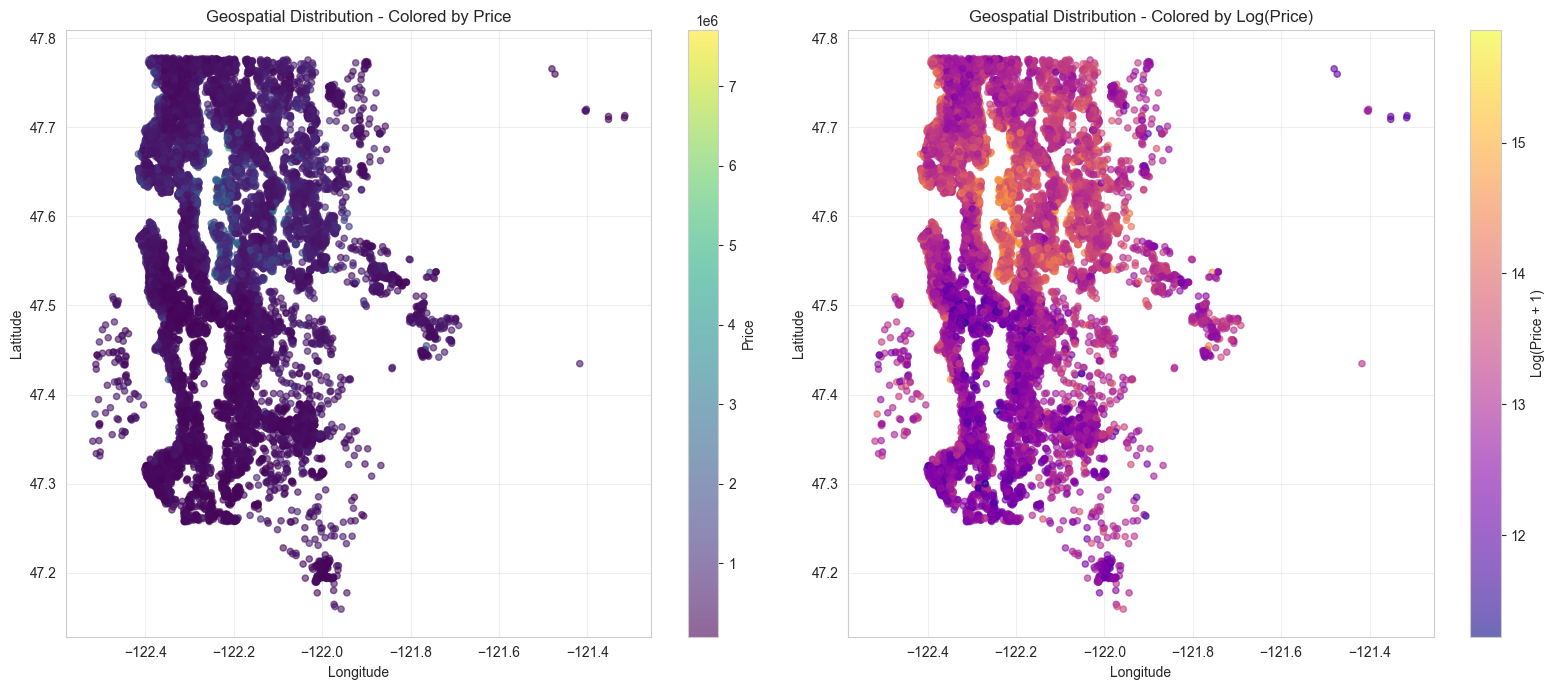

Latitude range: [47.1593, 47.7776]
Longitude range: [-122.5190, -121.3150]


In [15]:
# Find latitude and longitude columns
lat_col = None
long_col = None

for col in train_df.columns:
    col_lower = col.lower()
    if 'lat' in col_lower and lat_col is None:
        lat_col = col
    if ('long' in col_lower or 'lng' in col_lower) and long_col is None:
        long_col = col

if lat_col and long_col and price_col:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Scatter plot colored by price
    scatter1 = axes[0].scatter(train_df[long_col], train_df[lat_col], 
                               c=train_df[price_col], cmap='viridis', 
                               alpha=0.6, s=20)
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Geospatial Distribution - Colored by Price')
    plt.colorbar(scatter1, ax=axes[0], label='Price')
    axes[0].grid(True, alpha=0.3)
    
    # Scatter plot colored by log(price)
    log_price = np.log1p(train_df[price_col])
    scatter2 = axes[1].scatter(train_df[long_col], train_df[lat_col], 
                               c=log_price, cmap='plasma', 
                               alpha=0.6, s=20)
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].set_title('Geospatial Distribution - Colored by Log(Price)')
    plt.colorbar(scatter2, ax=axes[1], label='Log(Price + 1)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Latitude range: [{train_df[lat_col].min():.4f}, {train_df[lat_col].max():.4f}]")
    print(f"Longitude range: [{train_df[long_col].min():.4f}, {train_df[long_col].max():.4f}]")
else:
    print("Could not find latitude/longitude columns.")
    print("Available columns:", train_df.columns.tolist())
    if lat_col:
        print(f"Found latitude column: {lat_col}")
    if long_col:
        print(f"Found longitude column: {long_col}")


## Summary

This EDA provides initial insights into:
- **Data structure**: Dataset dimensions and basic information
- **Data quality**: Missing values and data types
- **Target distribution**: Price distribution and benefits of log transformation
- **Outliers**: Identification of extreme values (not removed yet)
- **Feature relationships**: Correlation between square footage and price
- **Spatial patterns**: Geographic distribution of property prices

**Next steps**: Proceed to feature engineering and baseline model development.
